## Midterm 2 - MNIST Classification
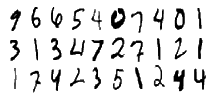
### Preparing environment and dataset:
* pip install python-mnist
* create folder midterm/data
* download from https://drive.google.com/open?id=1AQwyy3xP7rjDWMPkWBW4kKOfpkIyAWt8 - 4 files
* extract all files to ./data

#### The error of your classifier on test dataset must be better then 12.0% LeCun et al. 1998
#### Enter your error at https://goo.gl/forms/JRDKcotcXf5LZM3I3
#### Commit your code to github/bitbucket into folder midterm


In [12]:
from mnist import MNIST
import random
mndata = MNIST('.\\data')

trimages, trlabels = mndata.load_training()
teimages, telabels = mndata.load_testing()
index = random.randrange(0, len(trimages))  # choose an index ;-)
print('The amount of train images',len(trimages))
print('The amount of test images',len(trimages))
print('The label of random image',trlabels[index],'The random image is',mndata.display(trimages[index]))
print('Images are binary with 28*28 = ',len(trimages[index]))

The amount of train images 60000
The amount of test images 60000
The label of random image 6 The random image is 
............................
............................
............................
...............@@...........
..............@@@...........
.............@@@@...........
............@@@@@...........
..........@@@@@.............
.........@@@@...............
.........@@@................
........@@@.................
.......@@@.........@@@......
.......@@@.....@@@@@@@@.....
.......@@.....@@...@.@@.....
.......@.....@@.......@.....
.......@.....@@.......@.....
.......@.....@@.....@@@.....
.......@....@@@@@@@@@@......
.......@@@@@@@@@@@@@@@......
.......@@@@@@@@@@@@@@.......
........@@@@@@@@@@@.........
........@@@@@@@@@...........
.........@@@................
............................
............................
............................
............................
............................
Images are binary with 28*28 =  784


In [13]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from keras.utils.np_utils import to_categorical

y = to_categorical(trlabels)
X = np.array(trimages)
model = Sequential()
model.add(Dense(128, input_dim=784, init='uniform', activation='relu'))
model.add(Dense(64, init='uniform', activation='relu'))
model.add(Dense(y.shape[1], init='uniform', activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\umit_s\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, input_dim=784, activation="relu", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
C:\Users\umit_s\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, activation="relu", kernel_initializer="uniform")`
  app.launch_new_instance()
C:\Users\umit_s\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="sigmoid", kernel_initializer="uniform")`


In [14]:
# Fit the model
model.fit(X, y, epochs=100, batch_size=2000, verbose=1)

Epoch 1/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.9028 - acc: 0.7086
Epoch 2/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.2222 - acc: 0.9337
Epoch 3/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.1430 - acc: 0.9576
Epoch 4/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.1061 - acc: 0.9683
Epoch 5/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.0840 - acc: 0.9752
Epoch 6/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.0703 - acc: 0.9791
Epoch 7/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.0577 - acc: 0.9827
Epoch 8/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.0458 - acc: 0.9868
Epoch 9/100
60000/60000 [==============================] - 1s 10us/step - loss: 0.0377 - acc: 0.9890
Epoch 10/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.0330 - ac

In [16]:
from sklearn.metrics import accuracy_score

teX = np.array(teimages)

accuracy_score(model.predict_classes(teX), np.array(telabels))

0.9833378688883622